In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
IMAGE_SIZE=256
CHANNELS=3
train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1506 images belonging to 3 classes.


In [9]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5735628  0.52258235 0.5500334 ]
  [0.57006395 0.51908356 0.54653454]
  [0.5665652  0.5155848  0.5430358 ]
  ...
  [0.5506538  0.51928127 0.51143813]
  [0.58243346 0.5510609  0.5432178 ]
  [0.57457644 0.5432039  0.53536075]]

 [[0.5882353  0.5372549  0.5647059 ]
  [0.5882353  0.5372549  0.5647059 ]
  [0.5882353  0.5372549  0.5647059 ]
  ...
  [0.5483213  0.51694876 0.5091056 ]
  [0.5911804  0.55980784 0.5519647 ]
  [0.56757885 0.5362063  0.52836317]]

 [[0.57712376 0.5261434  0.55359435]
  [0.58178884 0.53080845 0.5582594 ]
  [0.5864538  0.5354734  0.5629244 ]
  ...
  [0.5459888  0.51461625 0.5067731 ]
  [0.5999273  0.56855476 0.5607116 ]
  [0.5605814  0.52920884 0.5213657 ]]

 ...

 [[0.65191007 0.6244591  0.65583163]
  [0.6643428  0.63689184 0.6682644 ]
  [0.68471575 0.65726477 0.6886373 ]
  ...
  [0.70677316 0.6675575  0.67147905]
  [0.7091057  0.66989    0.67381155]
  [0.7114382  0.67222244 0.676144  ]]

 [[0.65365946 0.6262085  0.65758103]
  [0.6678416  0.64039063 0.6717632 ]


In [10]:
validation_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)
validation_generator=validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [12]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator=test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 431 images belonging to 3 classes.


In [14]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)          │ (None, 254, 254,  │       896 │
│                          │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d            │ (None, 127, 127,  │         0 │
│ (MaxPooling2D)           │ 32)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_1 (Conv2D)        │ (None, 125, 125,  │    18,496 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_1          │ (None, 62, 62,    │         0 │
│ (MaxPooling2D)           │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_2 (Conv2D)        │ (None, 60, 60,    │    36,928 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_2          │ (None, 30, 30,    │         0 │
│ (MaxPooling2D)           │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_3 (Conv2D)        │ (None, 28, 28,    │    36,928 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_3          │ (None, 14, 14,    │         0 │
│ (MaxPooling2D)           │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_4 (Conv2D)        │ (None, 12, 12,    │    36,928 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_4          │ (None, 6, 6, 64)  │         0 │
│ (MaxPooling2D)           │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ conv2d_5 (Conv2D)        │ (None, 4, 4, 64)  │    36,928 │
├──────────────────────────┼───────────────────┼───────────┤
│ max_pooling2d_5          │ (None, 2, 2, 64)  │         0 │
│ (MaxPooling2D)           │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ flatten (Flatten)        │ (None, 256)       │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)            │ (None, 64)        │    16,448 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_1 (Dense)          │ (None, 3)         │       195 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
1506/32

47.0625

In [17]:
215/32

6.71875

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history=model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4396 - loss: 0.9487 - val_accuracy: 0.4531 - val_loss: 0.8777
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 37s 821ms/step - accuracy: 0.5312 - loss: 0.8776

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.5312 - loss: 0.8776 - val_accuracy: 0.4740 - val_loss: 0.8749
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5497 - loss: 0.8274 - val_accuracy: 0.7083 - val_loss: 0.6381
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.6875 - loss: 0.6693 - val_accuracy: 0.7292 - val_loss: 0.5909
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7729 - loss: 0.5155 - val_accuracy: 0.8698 - val_loss: 0.3530
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.7500 - loss: 0.4336 - val_accuracy: 0.8229 - val_loss: 0.3646
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8425 - loss: 0.3652 - val_accuracy: 0.8490 - val_loss: 0.3481
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9375 - loss: 0.2285 - val_accuracy: 0.8333 - val_loss: 0.3635
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9179 - loss: 0.2220 - val_accuracy: 0.8958 - val_loss: 0.

In [22]:
scores=model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9209 - loss: 0.2209


In [23]:
scores

[0.22348065674304962, 0.9211136698722839]

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [27]:
type(history.history['loss'])

list

In [28]:
len(history.history['loss'])

20

In [29]:
history.history['loss'][:5]

[0.9083898663520813,
 0.8776233792304993,
 0.777971088886261,
 0.6692714095115662,
 0.44315850734710693]

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [31]:
val_acc

[0.453125,
 0.4739583432674408,
 0.7083333134651184,
 0.7291666865348816,
 0.8697916865348816,
 0.8229166865348816,
 0.8489583134651184,
 0.8333333134651184,
 0.8958333134651184,
 0.9010416865348816,
 0.8697916865348816,
 0.890625,
 0.9322916865348816,
 0.921875,
 0.9270833134651184,
 0.9166666865348816,
 0.8958333134651184,
 0.9010416865348816,
 0.921875,
 0.8958333134651184]

In [32]:
acc

[0.4572591483592987,
 0.53125,
 0.6248303651809692,
 0.6875,
 0.8066485524177551,
 0.75,
 0.8521031141281128,
 0.9375,
 0.9109042286872864,
 1.0,
 0.9280868172645569,
 0.96875,
 0.9213025569915771,
 0.9375,
 0.9362279772758484,
 0.90625,
 0.9124830365180969,
 0.84375,
 0.9436906576156616,
 0.96875]

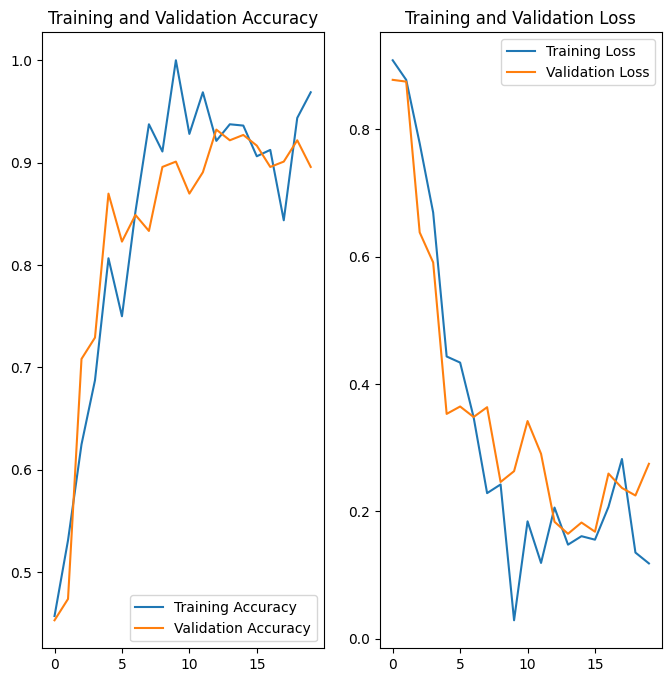

In [33]:
EPOCHS=20

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
predicted label: Potato___Early_blight


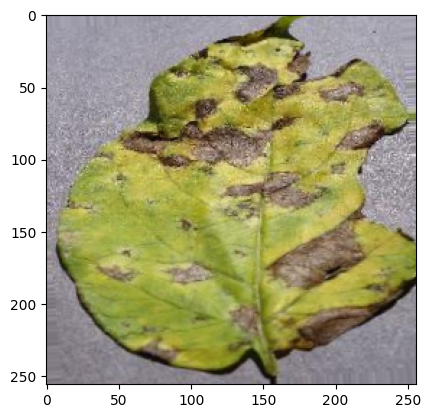

In [36]:
import numpy as np
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
for images_batch, labels_batch in test_generator:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [37]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


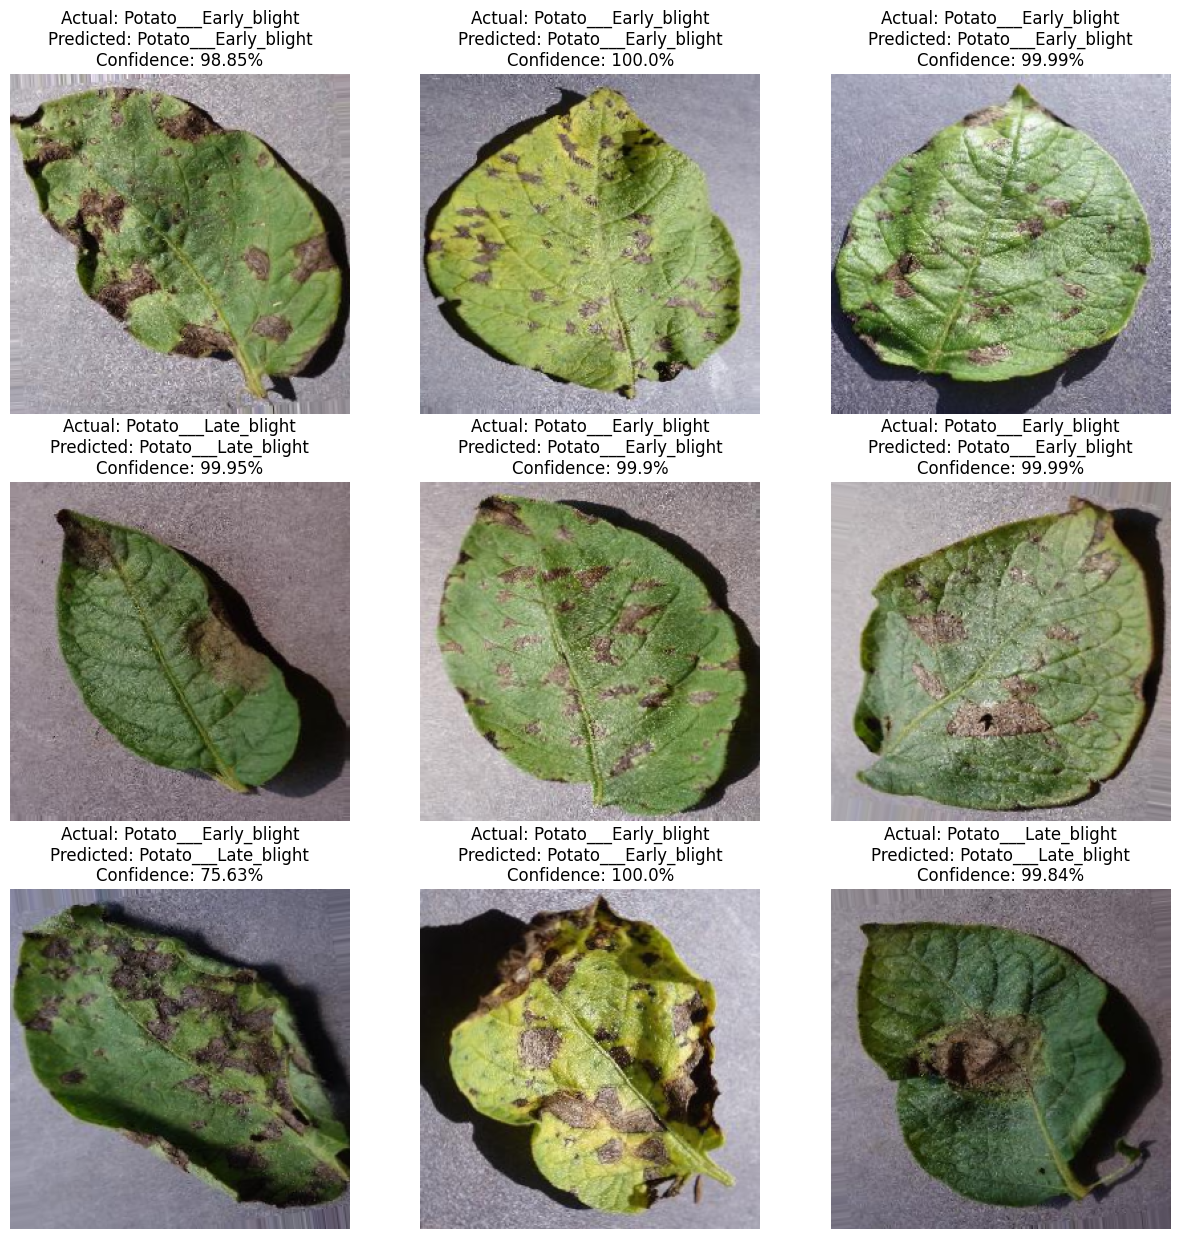

In [38]:
plt.figure(figsize=(15,15))
for images,labels in test_generator:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])

        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis('off')
    break

In [39]:
model.save("../potatoes.h5")

In [40]:
model_version = 2
model.export(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


Saved artifact at '../models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1906312859664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904923264400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947335376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947335568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947334992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947336144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947334224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947336528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947332688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947337296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1904947337680: TensorSpec(shape=(), dty